In [122]:
import pandas as pd
from pandas import Series
import sys
import numpy as np
import platform
import matplotlib.pyplot as plt
plt.style.use('seaborn-notebook')
plt.rcParams['figure.figsize'] = (15, 5)
%matplotlib inline
import seaborn as sns

In [113]:
print("Sistema operativo:     ", platform.platform())
print("Versión de Python:     ", sys.version)
print("Versión de Pandas:     ", pd.__version__)
print("Versión de Numpy:      ", np.version.short_version)

Sistema operativo:      Linux-4.9.71-1-MANJARO-x86_64-with-arch-Manjaro-Linux
Versión de Python:      3.6.1 |Continuum Analytics, Inc.| (default, May 11 2017, 13:09:58) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]
Versión de Pandas:      0.21.0
Versión de Numpy:       1.13.3


### Pandas   
Pandas es una librería de python que permite trabajar con la información tabular de forma eficiente.

Funciona muy bien cuando analizamos:

* Datos heterogéneos que pueden distribuirse en tablas.
* Series temporales
* Matrices
* ...   

Lo usaremos para cargar los tuits que hemos obtenido para su analisis. Estos se encuentran en formato .csv (del inglés comma-separated values), un tipo de documento en formato abierto sencillo para representar datos en forma de tabla, en las que las columnas se separan por comas.   

Un `dataframe` en pandas se puede ver como una tabla con filas indexadas y columnas. Es algo similar a lo que tenemos en una hoja de cálculo. Esta será la estructura de datos que representará nuestra tabla de tuits.

Una vez cargados los datos, podemos definir los índices para las filas o las etiquetas para las columnas. Cada fila es una observación y cada columna una categoria. Si no se define nada al cargar el DataFrame, se creara un indice numérico para las observaciones y se tomará la primera fila como los nombres de las categorias. 

En nuestro caso podemos cargar los datos a un objeto llamado `df` con la siguiente instrucción:

In [2]:
df = pd.read_csv('data/alltopics.csv', index_col=0)
df.head()

,Usuario,Nombre,Fecha,Tweet,RT,like,path,verificados,tópico,sentimiento,categoría
0,@jaymee_danielle,zen kitty,10 dic. 2017,issues i have w/ GMO:\n• doesnt taste “natural...,67,179,/jaymee_danielle/status/939965734196842496,NaN,Allergy,0.0900,Neutral
1,@systecdb,Dave Baggett,10 dic. 2017,It dawns on me that before GMO foods became pr...,0,1,/systecdb/status/939776697724997632,NaN,Allergy,0.4767,Positivo
2,@saltedveg,ingin punya tuyul saja,10 dic. 2017,Coz it's 'cool'. Just like people who suddenly...,1,1,/saltedveg/status/939675324765298688,NaN,Allergy,0.9068,Positivo
3,@RMathebulo,Rantho Mathebulo,9 dic. 2017,Alcoholism gout acne genetically modified food...,0,0,/RMathebulo/status/939601946960453633,NaN,Allergy,-0.7412,Negativo
4,@carmelabny,JOSEPHINE BOLOGNA,8 dic. 2017,Foods to eat every day and a healthy product t...,7,4,/carmelabny/status/939102225800028160,NaN,Allergy,0.4738,Positivo


La función `head()` nos permite dar un vistazo a las primeras filas del dataframe.   
Los nombres de las columnas parecen adecuados. Es importante modificar las columnas o el índice si no resultan entendibles. Ante todo debe primar la facilidad de uso.    

Es de destacar que cualquier modificación que hagamos al dataframe no alterará el archivo con nuestros datos. Solo altera la representación que el programa tiene de este archivo. Siempre existe la posibilidad de guardar el dataframe modificado con el mismo o otro nombre escribiendo `df.to_csv('Nombre del archivo.csv')`     

Uno de los primeros pasos tras cargar un dataframe es echar un vistazo a índice y columnas (del índice veremos una representación abreviada, ya que es un número muy elevado) 

In [5]:
print('INDICE: ')
print('')
print(df.index.values)
print('')
print('COLUMNAS')
print('')
print(df.columns.values)

INDICE: 

[    0     1     2 ..., 12542 12543 12544]

COLUMNAS

['Usuario' 'Nombre' 'Fecha' 'Tweet' 'RT' 'like' 'path' 'verificados'
 'tópico' 'sentimiento' 'categoría']


### Selección de datos

Una vez hemos dado un vistazo a nuestros datos, debemos aprender como seleccionar una parte de ellos para nuestro análisis. Es una tarea sencilla que puede realizarse de dos maneras. 

Al cargar nuestra tabla de datos se ha creado un objeto dentro del lenguaje de programación que la representa. En nuestro caso ese objeto lo hemos nombrado como `df`. De este modo, tanto `df.nombreDeLaColumna` como `df[nombreDeLaColumna]` nos selecionaran solo los datos de la columna con ese mismo nombre. 

In [6]:
df.Usuario

0        @jaymee_danielle
1               @systecdb
2              @saltedveg
3             @RMathebulo
4             @carmelabny
5            @TradMatador
6         @jeffjeffjeff_o
7         @DylanCornelius
8            @DocCamiRyan
9           @OccDemParody
10              @TheaGood
11       @FarmFairyCrafts
12            @GMOAnswers
13            @carmelabny
14             @clariti38
15           @Turnballerr
16              @duabusan
17           @HeidiCoomer
18            @TeriGentes
19         @DiscountComic
20           @GF_Fastfood
21          @DBAWisconsin
22           @beachvetlbc
23        @TweetieNiichan
24          @lassiter1550
25       @Gr8nessNaHoodie
26           @mandyspizza
27             @8extremes
28               @Nudge52
29               @Recloos
               ...       
12515          @Marndin12
12516        @Mattit_TOFY
12517       @AfrikaAzania
12518             @skirbi
12519             @MRains
12520            @VaxCalc
12521           @tonykeck
12522       

Es una lista de nombres extensa ya que estamos trabajando con muchos datos pero podemos tomar solo una parte de ellos. Por ejemplo, la expresión `df.Nombre[0:10]` debería devolvernos tan solo los datos que aparecen en la columna nombre entre el primero (con índice 0) y el décimo (con índice 9). 

In [7]:
df.Nombre[0:10]


0                 zen kitty
1              Dave Baggett
2    ingin punya tuyul saja
3          Rantho Mathebulo
4         JOSEPHINE BOLOGNA
5                   Matador
6          Jefferey Ostlind
7           Dylan Cornelius
8                 Cami Ryan
9                       ODP
Name: Nombre, dtype: object

Podemos seleccionar filas en lugar de columnas, `df.xs(id)` o combinaciones de filas `df.ix[id1:id2]` o incluso filas/columnas según un requisito dado `df[df['like'] > 30]['Tweet']` (seleciona el dataframe en el que se cumple que la columna like > 30 mostrando solo la columna tuit)

### Funciones

Ahora que sabemos seleccionar partes de nuestro dataframe, podemos aplicar funciones al conjunto de datos que se genera. Una función muy común es `len()`, que nos devuleve la longitud o la suma del conjunto de elementos. 

In [8]:
print(len(df), 'filas')
print(len(df.columns), 'columnas')

12545 filas
11 columnas


Veamos algunas que nos resultaran interesantes. Podemos ordenar con `sort()` o encontrar los valores máximos `max()` o mínimos `min()`, agrupar siguiendo algún criterio `groupby()` o calcular la media `mean()`

In [11]:
print('TUIT CON MÁXIMO NÚMERO DE LIKES')
print('')
print(df['Tweet'][df.like == df.like.max()])
print('')
print('TUIT CON MÁXIMO NÚMERO DE RT')
print('')
print(df['Tweet'][df.RT == df.RT.max()])
print('')
print('MEDIA DE LIKES')
print('')
int(df.like.mean())

TUIT CON MÁXIMO NÚMERO DE LIKES

7632    FDA approves "living drug" that involves using...
Name: Tweet, dtype: object

TUIT CON MÁXIMO NÚMERO DE RT

4113    Sweet potatoes are transgenic crops.\nCultivar...
Name: Tweet, dtype: object

MEDIA DE LIKES



2

Una función muy interesante que podemos usar con nuestro dataframe es `df.Usuario.unique()`. Con ella podemos obtener una lista con nombres de usuario únicos, sin repetir. 

In [20]:
len(df.Usuario.unique())

7272

In [21]:
len(df.Tweet.unique())

11492

In [22]:
print(len(df.Usuario.unique()), 'usuarios diferentes han tuiteado', len(df.Tweet.unique()), 'tuits diferentes de un total de', len(df.Usuario))

7272 usuarios diferentes han tuiteado 11492 tuits diferentes de un total de 12545


Podemos crear funciones que nos vayan a ser útiles para el análisis. La siguiente función es capaz de recorrer una columna y contar las veces en que aparece repetido cada elemento. Nos devolverá un diccionario de los n elementos mas habituales. 

In [23]:
def duplicados(columna, n):
    lista_columna = list(columna)
    diccionario_duplicados = {}
    
    for name in lista_columna:
        if name not in diccionario_duplicados:
            diccionario_duplicados[name]=1
        else:
            diccionario_duplicados[name]+=1
    diccionario_duplicados = {k:v for (k,v) in diccionario_duplicados.items() if v > n}
    
    return diccionario_duplicados

In [25]:
usuarios_habituales = duplicados(df.Usuario, 30)
usuarios_habituales

{'@8extremes': 104,
 '@AmandaChidlow': 43,
 '@EcoInternet3': 38,
 '@EnviroEdgeNews': 47,
 '@FarmFairyCrafts': 300,
 '@GMOjournal': 36,
 '@GMWatch': 129,
 '@GenEngNetwork': 37,
 '@Luftdebatten': 32,
 '@MADGEAustralia': 36,
 '@NoGMOsVerified': 579,
 '@NonGMOProject': 38,
 '@Olivefarmer': 111,
 '@PositivelyJoan': 153,
 '@ShineJob': 31,
 '@achengula': 31,
 '@agbiotech': 58,
 '@beachvetlbc': 112,
 '@gmo_crops': 143,
 '@mem_somerville': 33,
 '@pjforguk': 31,
 '@twitevit': 62}

In [73]:
def f(x):
     return Series(dict(Number_of_tweets = x['Tweet'].count(), 
                        Nombre=x['Nombre'].min()
                        ))

In [ ]:
account_count = df.groupby('Usuario').apply(f) 

In [77]:
account_count = account_count.sort_values(['Number_of_tweets'], ascending=False)[:10]
account_count

,Nombre,Number_of_tweets
Usuario,,
@NoGMOsVerified,NoGMOsVerified,579
@FarmFairyCrafts,Farm Fairy Crafts,300
@PositivelyJoan,Positively Joan,153
@gmo_crops,GMO Crop News,143
@GMWatch,GMWatch,129
@beachvetlbc,Notorious KGB Aggie,112
@Olivefarmer,Philli H,111
@8extremes,8extremes,104
@twitevit,Tom Andersen,62


In [100]:
print(plt.style.available)

['seaborn-notebook', '_classic_test', 'fivethirtyeight', 'seaborn-paper', 'seaborn-muted', 'seaborn-dark-palette', 'seaborn-ticks', 'seaborn-white', 'seaborn-dark', 'Solarize_Light2', 'seaborn-colorblind', 'seaborn-talk', 'bmh', 'grayscale', 'seaborn-darkgrid', 'seaborn-poster', 'seaborn-deep', 'seaborn', 'fast', 'seaborn-whitegrid', 'classic', 'seaborn-bright', 'ggplot', 'seaborn-pastel', 'dark_background']


Text(0,0.5,'Numero de Tweets')

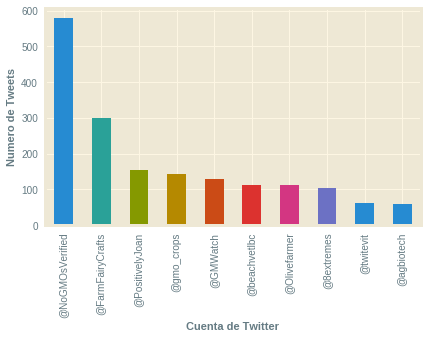

In [123]:
account_plot = account_count['Number_of_tweets'].plot(kind='bar')
account_plot.set_xlabel('Cuenta de Twitter', weight='bold')   
account_plot.set_ylabel('Numero de Tweets', weight='bold')


In [27]:
tuits_habituales = duplicados(df.Tweet, 15)
tuits_habituales

{"Failure to Rule Out Allergenicity Renders Monsanto's #GMO Hammond Study Inconclusive: http://GMOnion.com\xa0\n#Allergies\n#DustMites": 24,
 'If Food is Medicine, & for FDA Approval Medicines Go Through Clinical Trials, Why is #GMO Food Treated Differently w/o Requiring Trials?': 16,
 'New England Journal Of Medicine says Label #GMO Clearly\nOn Package Easy2C\nExpert Advise\n@clairecmc MO @RoyBlunt MOhttp://tinyurl.com/hf3vxu5': 17,
 'Possible consequences... in transgenic plants: http://www.tandfonline.com/doi/abs/10.4161/gmcr.21406\xa0…\nTranslation: GMOs cause #Allergies and more.': 21}

In [137]:
POS = 0
NEG = 0
NEU = 0
for categoria in df['categoría'][df['Usuario']=='@gmo_crops']:
    if categoria == 'Positivo':
        POS = POS + 1
    elif categoria == 'Negativo':
        NEG = NEG +1
    else:
        NEU = NEU + 1
print(np.round(POS/len(df['categoría'][df['Usuario']=='@gmo_crops'])*100, 2), '% de tuits positivos')
print(np.round(NEG/len(df['categoría'][df['Usuario']=='@gmo_crops'])*100, 2), '% de tuits negativos')
print(np.round(NEU/len(df['categoría'][df['Usuario']=='@gmo_crops'])*100, 2), '% de tuits neutrales')


9.09 % de tuits positivos
4.2 % de tuits negativos
86.71 % de tuits neutrales


In [143]:
def usuario_percent(usuario):
    POS = 0
    NEG = 0
    NEU = 0
    for categoria in df['categoría'][df['Usuario']==usuario]:
        if categoria == 'Positivo':
            POS = POS + 1
        elif categoria == 'Negativo':
            NEG = NEG +1
        else:
            NEU = NEU + 1
    ppos = np.round(POS/len(df['categoría'][df['Usuario']==usuario])*100, 2)
    pneg = np.round(NEG/len(df['categoría'][df['Usuario']==usuario])*100, 2)
    pneu = np.round(NEU/len(df['categoría'][df['Usuario']==usuario])*100, 2)
    pdic = {}
    pdic['pos'] = ppos
    pdic['neg'] = pneg
    pdic['neu'] = pneu
    return pdic
    


In [144]:
usuario_percent('@NoGMOsVerified')

{'neg': 30.57, 'neu': 63.210000000000001, 'pos': 6.2199999999999998}

In [149]:
for account in account_count.index:
    print(account, usuario_percent(account))

@NoGMOsVerified {'pos': 6.2199999999999998, 'neg': 30.57, 'neu': 63.210000000000001}
@FarmFairyCrafts {'pos': 14.0, 'neg': 36.0, 'neu': 50.0}
@PositivelyJoan {'pos': 8.5, 'neg': 52.939999999999998, 'neu': 38.560000000000002}
@gmo_crops {'pos': 9.0899999999999999, 'neg': 4.2000000000000002, 'neu': 86.709999999999994}
@GMWatch {'pos': 9.3000000000000007, 'neg': 30.23, 'neu': 60.469999999999999}
@beachvetlbc {'pos': 17.859999999999999, 'neg': 17.859999999999999, 'neu': 64.290000000000006}
@Olivefarmer {'pos': 8.1099999999999994, 'neg': 11.710000000000001, 'neu': 80.180000000000007}
@8extremes {'pos': 12.5, 'neg': 46.149999999999999, 'neu': 41.350000000000001}
@twitevit {'pos': 6.4500000000000002, 'neg': 43.549999999999997, 'neu': 50.0}
@agbiotech {'pos': 39.659999999999997, 'neg': 24.140000000000001, 'neu': 36.210000000000001}


In [28]:
def añade_año(dataframe):
    years = []
    
    for f in dataframe.Fecha:
        try:
            year = f.split('. ')[1]
            years.append(year)
        except:
            print('No se pudo obtener el año de todos los elementos. ')
            break
    dataframe.insert(3, 'Año', years)  

In [29]:
añade_año(df)

In [30]:
df.head()

,Usuario,Nombre,Fecha,Año,Tweet,RT,like,path,verificados,tópico,sentimiento,categoría
0,@jaymee_danielle,zen kitty,10 dic. 2017,2017,issues i have w/ GMO:\n• doesnt taste “natural...,67,179,/jaymee_danielle/status/939965734196842496,NaN,Allergy,0.0900,Neutral
1,@systecdb,Dave Baggett,10 dic. 2017,2017,It dawns on me that before GMO foods became pr...,0,1,/systecdb/status/939776697724997632,NaN,Allergy,0.4767,Positivo
2,@saltedveg,ingin punya tuyul saja,10 dic. 2017,2017,Coz it's 'cool'. Just like people who suddenly...,1,1,/saltedveg/status/939675324765298688,NaN,Allergy,0.9068,Positivo
3,@RMathebulo,Rantho Mathebulo,9 dic. 2017,2017,Alcoholism gout acne genetically modified food...,0,0,/RMathebulo/status/939601946960453633,NaN,Allergy,-0.7412,Negativo
4,@carmelabny,JOSEPHINE BOLOGNA,8 dic. 2017,2017,Foods to eat every day and a healthy product t...,7,4,/carmelabny/status/939102225800028160,NaN,Allergy,0.4738,Positivo


In [35]:
by_year = df.groupby('Año')
by_year.describe()['RT'][['count', 'mean', 'std', 'max']]

,count,mean,std,max
Año,,,,
2009,4.0,0.000000,0.000000,0.0
2010,25.0,0.440000,1.445683,7.0
2011,43.0,0.627907,1.234875,5.0
2012,77.0,0.987013,2.022853,14.0
2013,79.0,2.936709,22.021750,196.0
2014,548.0,1.465328,3.569713,35.0
2015,753.0,2.245684,7.724783,125.0
2016,3339.0,1.924528,12.645332,599.0
2017,7677.0,1.943468,13.888953,751.0


In [36]:
by_year = df.groupby('Año')
by_year.describe()['like'][['count', 'mean', 'std', 'max']]

,count,mean,std,max
Año,,,,
2009,4.0,0.250000,0.500000,1.0
2010,25.0,0.120000,0.600000,3.0
2011,43.0,0.046512,0.213083,1.0
2012,77.0,0.259740,0.571300,2.0
2013,79.0,2.556962,20.909295,186.0
2014,548.0,0.671533,1.497637,15.0
2015,753.0,1.345286,5.158940,101.0
2016,3339.0,1.986523,9.960924,321.0
2017,7677.0,2.593461,16.882430,925.0


In [39]:
df.groupby(['Año', 'categoría'], as_index=False).mean()

,Año,categoría,RT,like,sentimiento
0,2009,Negativo,0.000000,0.000000,-0.883400
1,2009,Neutral,0.000000,0.333333,0.067433
2,2010,Negativo,0.000000,0.000000,-0.640200
3,2010,Neutral,0.454545,0.136364,0.033491
4,2010,Positivo,0.500000,0.000000,0.668050
5,2011,Negativo,0.000000,0.000000,-0.546950
6,2011,Neutral,0.702703,0.054054,0.040232
7,2011,Positivo,0.250000,0.000000,0.654350
8,2012,Negativo,0.000000,0.000000,-0.795329
9,2012,Neutral,1.092308,0.292308,0.027252


In [40]:
df_verificados = df[df.verificados == 'Usuario Verificado'] 

In [42]:
len(df_verificados)

235

In [48]:
POS = 0
NEG = 0
NEU = 0
for categoria in df_verificados['categoría']:
    if categoria == 'Positivo':
        POS = POS + 1
    elif categoria == 'Negativo':
        NEG = NEG +1
    else:
        NEU = NEU + 1
print(POS/len(df_verificados)*100)
print(NEG/len(df_verificados)*100)
print(NEU/len(df_verificados)*100)

20.425531914893615
17.02127659574468
62.5531914893617


In [49]:
print(df[df.verificados == 'Usuario Verificado']['RT'].mean())
print(df[df.verificados == 'Usuario Verificado']['like'].mean())
print(df[df.verificados != 'Usuario Verificado']['RT'].mean())
print(df[df.verificados != 'Usuario Verificado']['like'].mean())

14.3489361702
16.5021276596
1.69082047116
1.97189277011


In [50]:
df.verificados = df.verificados.fillna('No verificado')
by_ver = df.groupby('verificados')
by_ver.describe()

RT                                                   \
                      count       mean        std  min  25%  50%  75%    max   
verificados                                                                    
No verificado       12310.0   1.690820   9.657550  0.0  0.0  0.0  1.0  599.0   
Usuario Verificado    235.0  14.348936  62.705368  0.0  0.0  2.0  8.0  751.0   

                       like              ...               sentimiento  \
                      count       mean   ...    75%    max       count   
verificados                              ...                             
No verificado       12310.0   1.971893   ...    1.0  547.0     12310.0   
Usuario Verificado    235.0  16.502128   ...    9.0  925.0       235.0   

                                                                             
                        mean       std     min     25%  50%     75%     max  
verificados                                                                  
No verificado      -0.087474  0.466491 -0.9826 -0.4939  0.0  0.2732  0.9800  
Usuario Verificado  0.047087  0.451480 -0.9022 -0.2500  0.0  0.4182  0.9054  

[2 rows x 24 columns]

In [51]:
by_ver.describe()['like'][['count', 'mean', 'std', 'max']]

,count,mean,std,max
verificados,,,,
No verificado,12310.0,1.971893,10.758723,547.0
Usuario Verificado,235.0,16.502128,68.708375,925.0


In [52]:
by_ver.describe()['RT'][['count', 'mean', 'std', 'max']]

,count,mean,std,max
verificados,,,,
No verificado,12310.0,1.690820,9.657550,599.0
Usuario Verificado,235.0,14.348936,62.705368,751.0


In [54]:
by_ver.describe()['sentimiento'][['count', 'mean', 'std', 'max']]

,count,mean,std,max
verificados,,,,
No verificado,12310.0,-0.087474,0.466491,0.9800
Usuario Verificado,235.0,0.047087,0.451480,0.9054
